<a href="https://colab.research.google.com/github/kristinak15/QM2-Group-4/blob/main/sentiment_analysis_from_research_paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np


In [6]:
gm_crops = pd.read_csv('/content/gm_crops.csv')
public = pd.read_csv('/content/state of GMOs on social media USA.csv')
 

In [7]:
#cleaning the data so I select the time period from 2016-2018 including the variety "All GE varieties"
gm_crops.drop(columns='Unnamed: 0',inplace=True)
gm_crops = gm_crops.iloc[2860:,]

In [8]:
gm_crops.head()

,Table,Unit,Variety,Year,Attribute,Value
2860,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2016,Arkansas,96
2861,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2016,Illinois,94
2862,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2016,Indiana,92
2863,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2016,Iowa,97
2864,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2016,Kansas,95


In [9]:
gm_crops= gm_crops.drop([2908,2909,2910,2911,2912,2913,2914,2915,2916,2917,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927,2928,2929,2930,2931,2932,2933,2934,2935,2936,2937,2938,2939])

In [10]:
gm_crops.tail()

,Table,Unit,Variety,Year,Attribute,Value
2903,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Ohio,91
2904,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,South Dakota,97
2905,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Wisconsin,92
2906,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,Other States,94
2907,Genetically engineered (GE) soybean varieties,Percent of all soybeans planted,All GE varieties,2018,U.S.,94


In [31]:
#cleaning the data so I only keep "neutral","positive","negative" sentiments. Also keeping the 13 most GMO-producing states as described by the USDA
public1 = public.drop(columns=['health & safety','enviro.','ag.','reg. & labeling '])
public1 = public1.drop([0,2,3,5,7,8,9,10,12,13,14,15,18,19,22,23,24,25,26,28,30,32,33,34,35,36,37,38,39,40,41,42,43,44,46,47,49,50])
#ordering the columns by the 'negative' value so the later graph looks cleaner and becomes easier to read  
public1.sort_values(by=['negative (%)'],inplace=True)


In [46]:
#setting the states column to be the index and retyoing the states with upper case letters 
publics = public1.set_index('state')
publics = publics.rename({"north dakota" :"North Dakota",'iowa':'Iowa','kansas':'Kansas','michigan':'Michigan', 'indiana':'Indiana','illinois':'Illinois','minnesota':'Minnesota','missouri':'Missouri','south dakota':'South Dakota','wisconsin':'Wisconsin','ohio':'Ohio','nebraska':'Nebraska','texas':'Texas'})

In [47]:
#checking
publics.head()

,total posts,negative (%),neutral,positive
state,,,,
North Dakota,"1,738",28,37,31
Iowa,"10,678",34,27,37
Kansas,"11,293",37,36,24
Michigan,"32,005",38,30,30
Indiana,"17,801",38,30,30


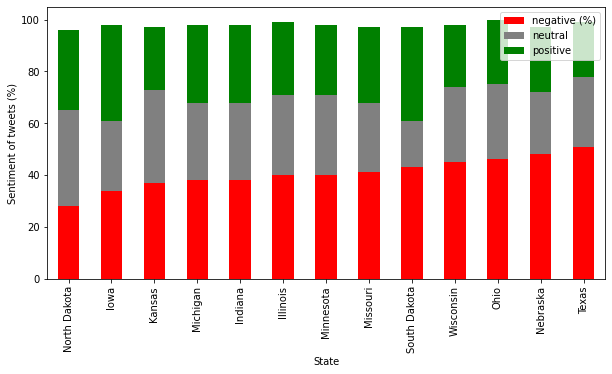

In [59]:
#plotting the data, selecting common colours for the three sentiments for the more visual people and adpating the size of the figure 

plot = publics.plot.bar( stacked=True, color={"negative (%)": "red", "positive": "green","neutral":"gray"}, figsize=(10,5))
plt.xlabel('State')
plt.ylabel('Sentiment of tweets (%)')

fig=plot.get_figure()

fig.savefig('SentAnalysis1')